In [24]:
# MNIST with PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform and Load Data
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Define Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(1, 6):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Testing
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item()

print(f"Test Accuracy: {100. * correct / len(test_loader.dataset):.2f}%")


Epoch 1, Loss: 0.3505
Epoch 2, Loss: 0.2400
Epoch 3, Loss: 0.0240
Epoch 4, Loss: 0.1064
Epoch 5, Loss: 0.0263
Test Accuracy: 97.47%


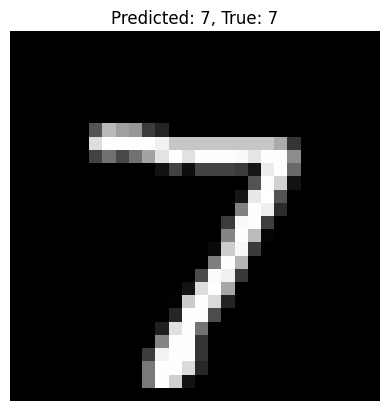

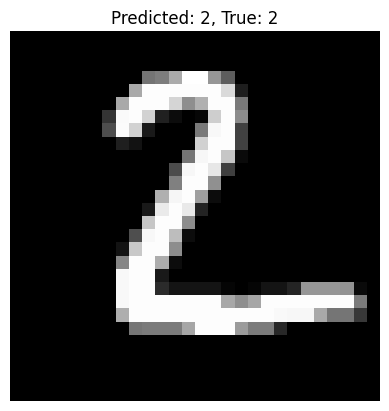

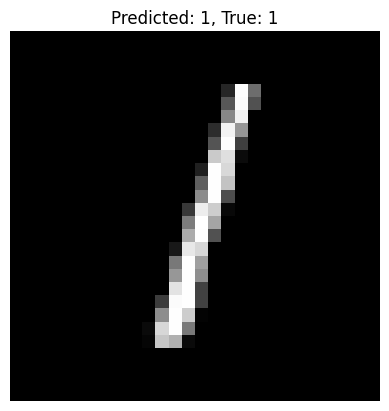

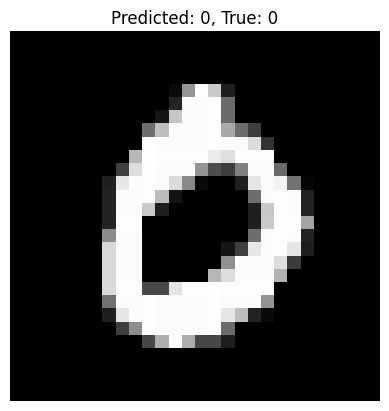

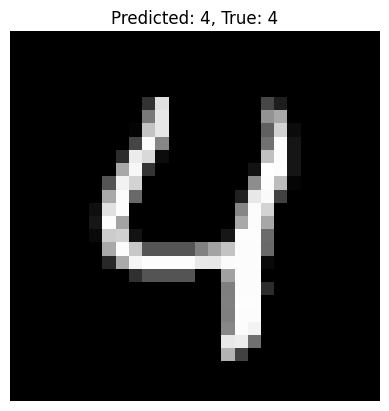

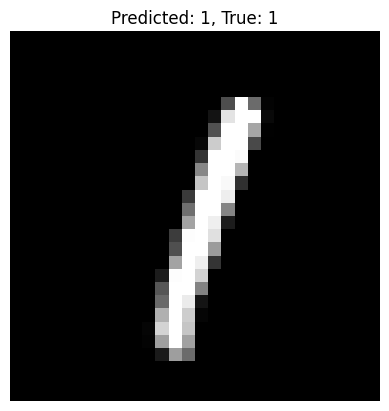

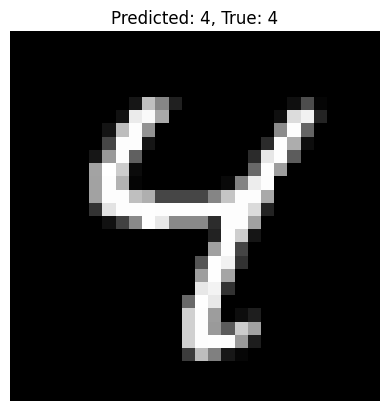

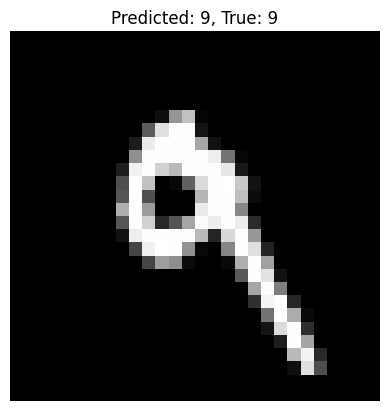

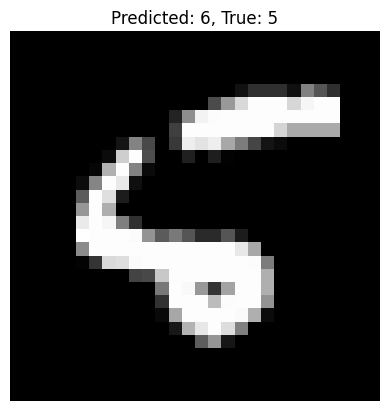

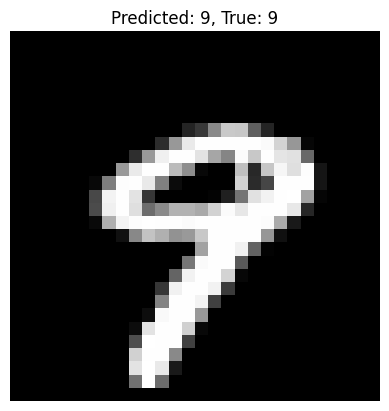

In [30]:
import torch

model.eval()  # Set model to evaluation mode
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data[:10])  # Get predictions for first 10 images

for i in range(10):
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title(f"Predicted: {output[i].argmax().item()}, True: {example_targets[i].item()}")
    plt.axis('off')
    plt.show()


In [31]:
# Step 1: Import Libraries Tensorflow/keras
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 3: Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Converts 2D image to 1D
    layers.Dense(128, activation='relu'),      # Hidden layer
    layers.Dense(64, activation='relu'),       # Additional layer (optional)
    layers.Dense(10, activation='softmax')     # Output layer for 10 digits
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8770 - loss: 0.4265 - val_accuracy: 0.9622 - val_loss: 0.1213
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9677 - loss: 0.1063 - val_accuracy: 0.9708 - val_loss: 0.0949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0659 - val_accuracy: 0.9709 - val_loss: 0.0987
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9847 - loss: 0.0481 - val_accuracy: 0.9751 - val_loss: 0.0818
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9871 - loss: 0.0400 - val_accuracy: 0.9761 - val_loss: 0.0838
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9719 - loss: 0.1022
Test Accuracy: 97.61%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


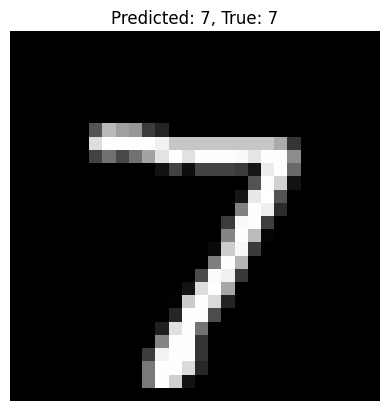

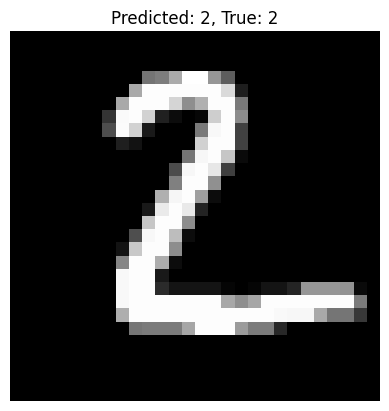

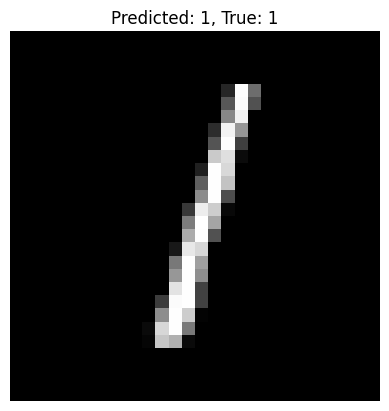

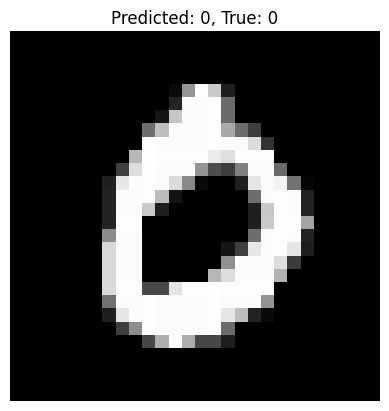

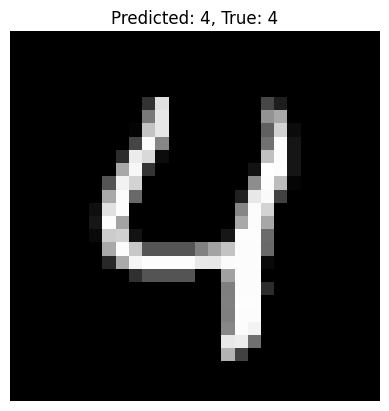

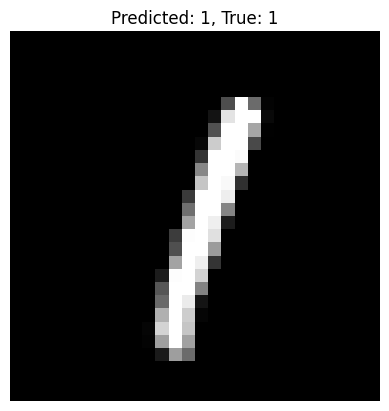

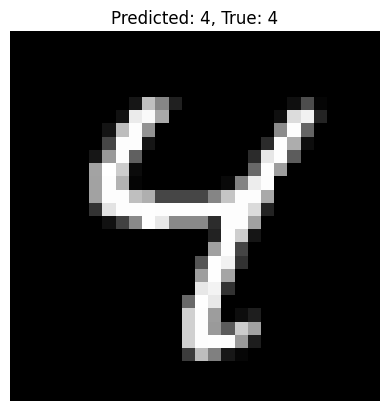

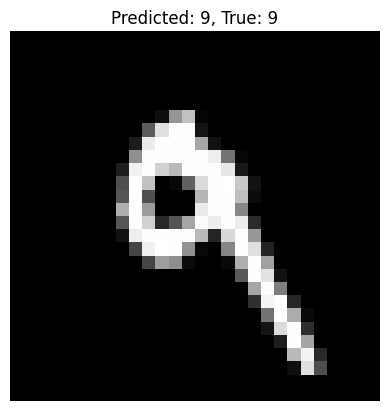

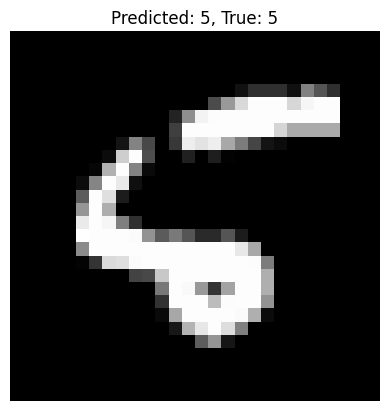

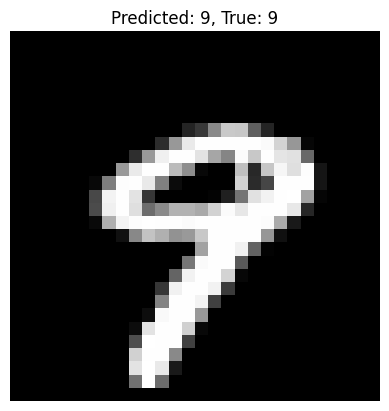

In [32]:
# Step 8: Make predictions and show first 10 results
predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()
